In [29]:
import pandas as pd
import sklearn # https://scikit-learn.org/stable/supervised_learning.html#supervised-learning 
import statsmodels
import io
import matplotlib as plt

In [22]:
import requests

url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
s=requests.get(url).content
df=pd.read_csv(io.StringIO(s.decode('ascii')))


In [24]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [26]:
print('titanic survival rate:', df.Survived.mean())

titanic survival rate: 0.3838383838383838


Text(0, 0.5, 'Survival Rate')

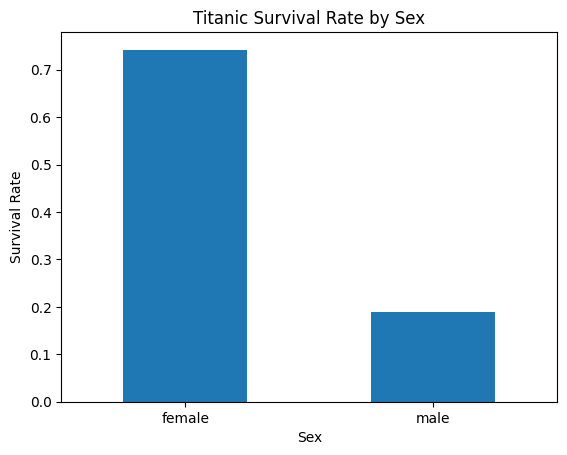

In [36]:
ax = df.groupby('Sex').Survived.mean().plot(kind='bar', rot=0)
ax.set_title('Titanic Survival Rate by Sex')
ax.set_ylabel('Survival Rate')

In [215]:
features_df = df.copy()

# here is where you can do feature engineering
cols = ['Sex', 'Age', 'Embarked']
features_df = features_df[cols]

# children
features_df['Age'] = (features_df.Age < 4).fillna(0)
features_df['Embarked'] = features_df.Embarked.fillna('none')

features_df = features_df[cols]

In [216]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer

# this cool bit of code takes care of categorical variables for you by 'one hot encoding'
v = DictVectorizer(sparse=False)
X = v.fit_transform(features_df.to_dict('records'))

y = df.Survived.values

n_split = 800

X_train, X_test = X[:n_split], X[n_split:]
y_train, y_test = y[:n_split], y[n_split:]

clf = LogisticRegression(random_state=0).fit(X, y)

In [217]:
test_records = [
    {'Sex': 'male'},
    {'Sex': 'female'}
]

class_probabilites = clf.predict_proba(v.transform(test_records))

# pull off the first record in the list
# and observe the probability of survival
print('male probability of survival:', class_probabilites[0][1])

# pull off the second record in the list
# and observe the probability of survival
print('femail probability of survival:', class_probabilites[1][1])

male probability of survival: 0.21484656539705457
femail probability of survival: 0.7707727062691998


In [218]:
from sklearn.metrics import accuracy_score
# predict the MLE class
y_prediction = clf.predict(X_test)

accuracy_score(y_test, y_prediction)


0.7912087912087912

In [ ]:
# build a classifier that beats my score 
# hint, there is at least one other really good feature + age currently does not provide any value